# Lead Scores Case Study

## Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

## Import Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd, numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

## Import Data

You have been provided with a leads dataset from the past with around 9000 data points. This dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. which may or may not be useful in ultimately deciding whether a lead will be converted or not. The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted. You can learn more about the dataset from the data dictionary provided in the zip folder at the end of the page. Another thing that you also need to check out for are the levels present in the categorical variables. Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value (think why?).

In [2]:
lead_data = pd.read_csv(r'C:\Users\revochteloo\Desktop\Leads.csv')
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## Inspecting the data

In [3]:
lead_data.shape

(9240, 37)

In [4]:
lead_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [5]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [6]:
null_counts = round((lead_data.isnull().sum()), 5)
null_counts

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [7]:
null_counts = round(100*(lead_data.isnull().sum()/len(lead_data.index)), 2)
null_counts

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [8]:
lead_data.nunique(axis = 0)

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [9]:
lead_data['How did you hear about X Education'] = lead_data['How did you hear about X Education'].replace('Select', np.nan)
lead_data['Specialization'] = lead_data['Specialization'].replace('Select', np.nan)
lead_data['Lead Profile'] = lead_data['Lead Profile'].replace('Select', np.nan)
lead_data['City'] = lead_data['City'].replace('Select', np.nan)

In [10]:
null_counts = round(100*(lead_data.isnull().sum()/len(lead_data.index)), 2)
null_counts

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

## Remove null values > 40%

In [11]:
for column in lead_data:
    if (100*(lead_data[column].isnull().sum()/(len(lead_data[column].index)))) > 40:
        lead_data.drop(column, axis=1, inplace=True)

In [12]:
null_counts = round(100*(lead_data.isnull().sum()/len(lead_data.index)), 2)
null_counts

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [13]:
lead_data = lead_data.drop(['Prospect ID'], axis = 1) ##Prospect ID and Lead Number have the same number of unique values

In [14]:
lead_data.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,...,No,No,No,Interested in other courses,No,No,NaN,No,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,...,No,No,No,Ringing,No,No,NaN,No,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,...,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


In [15]:
lead_data.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

## Understand categorical data

In [16]:
#Univariate analysis
def univar_graph(df, col, vartype):
    plt.figure(figsize = (7,5))
    sns.countplot(lead_data[col], hue=lead_data['Converted'])
    plt.ylabel('Lead Number')
    plt.xlabel(col)
    plt.xticks(rotation=90)

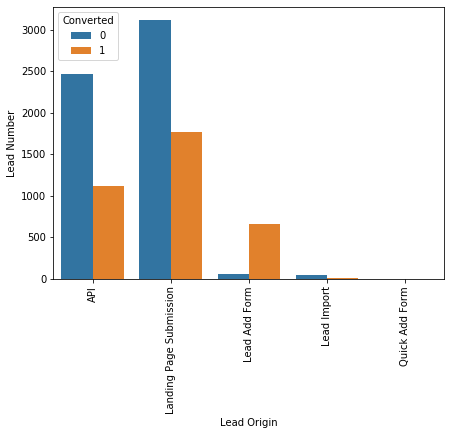

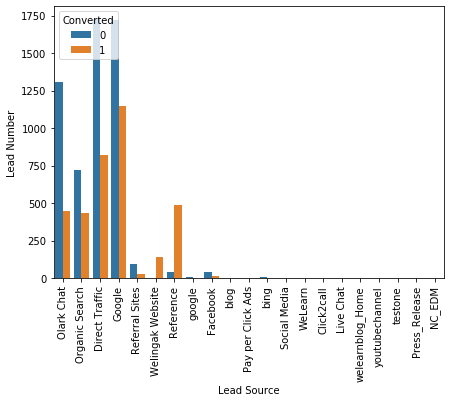

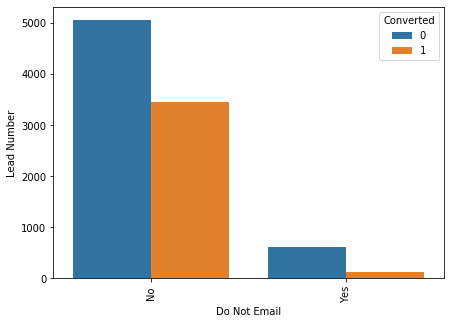

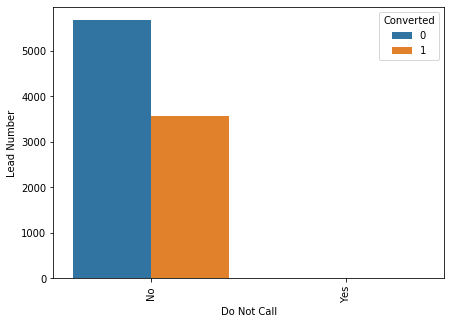

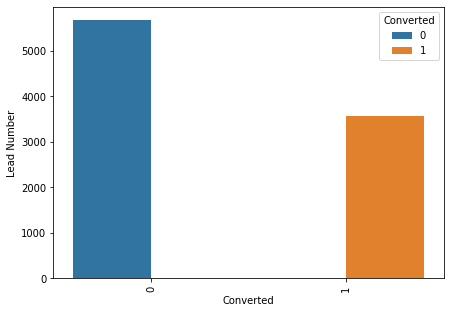

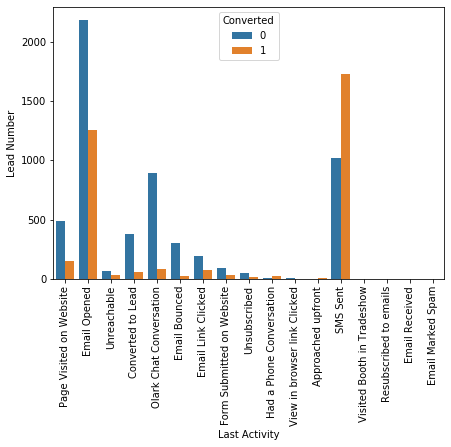

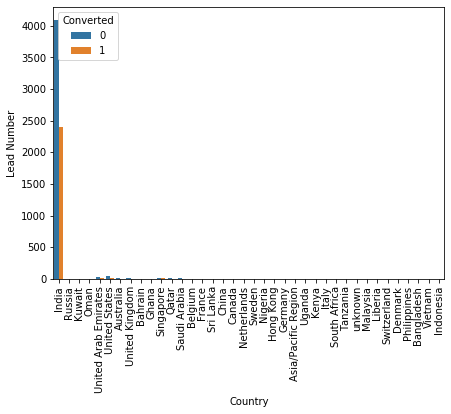

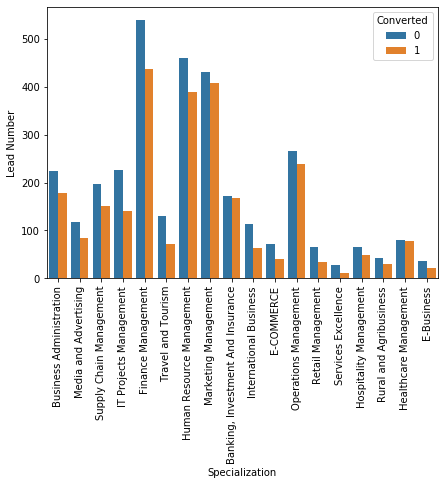

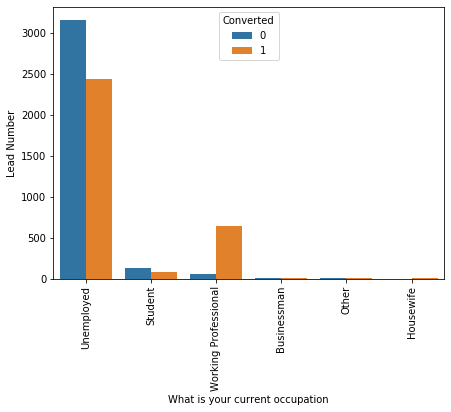

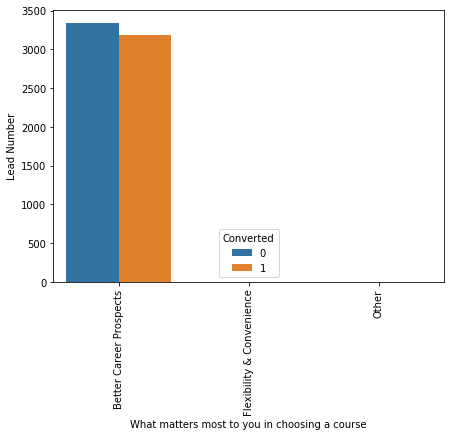

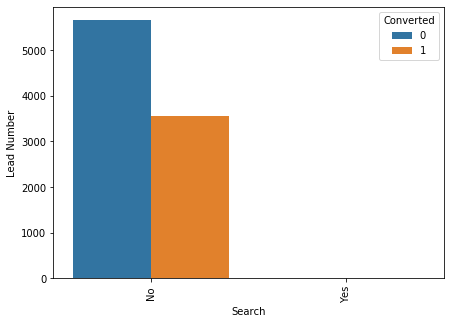

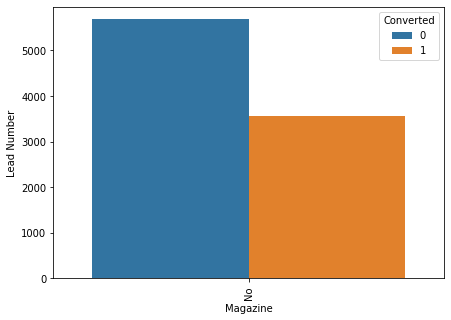

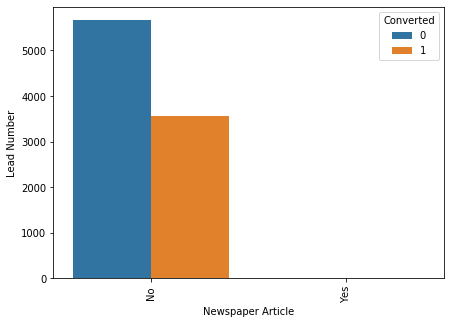

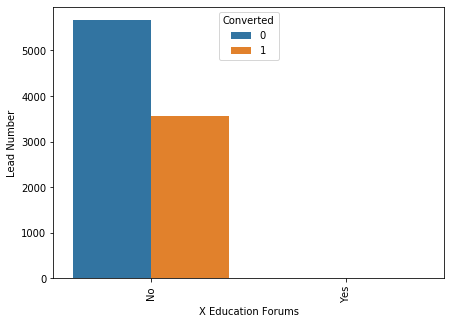

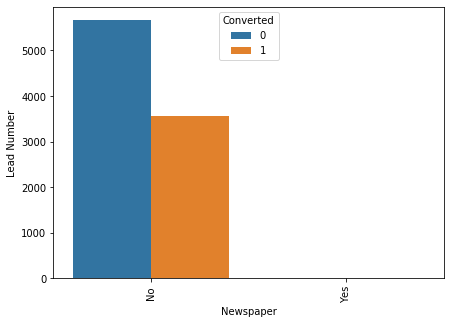

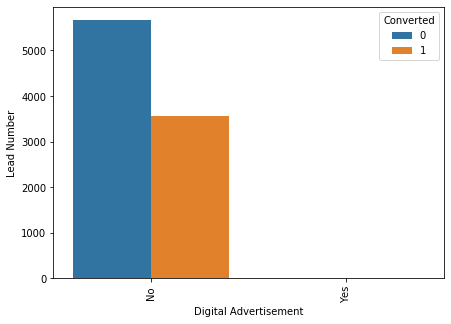

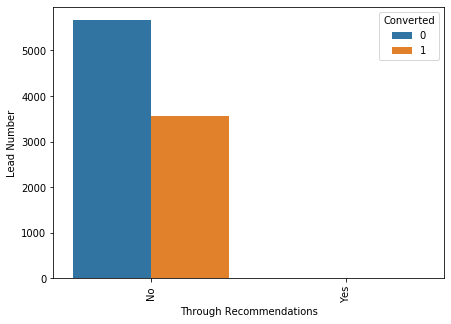

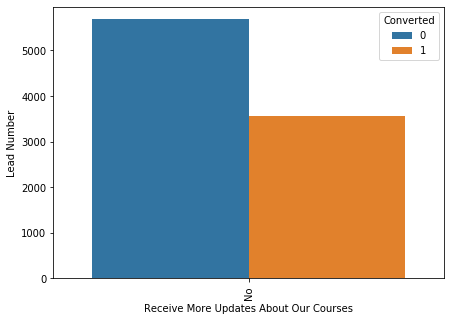

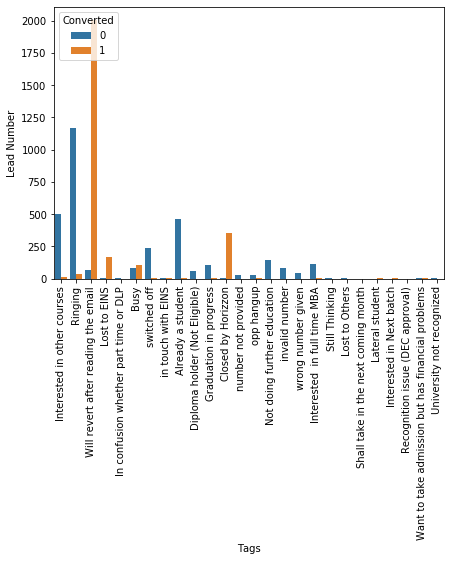

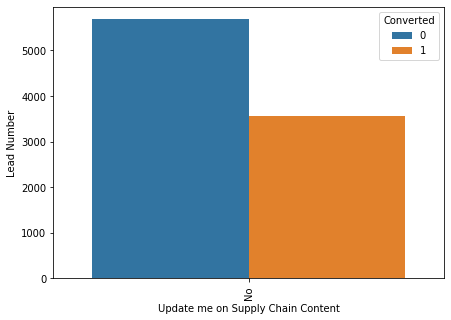

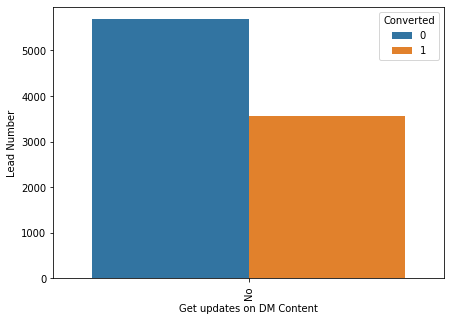

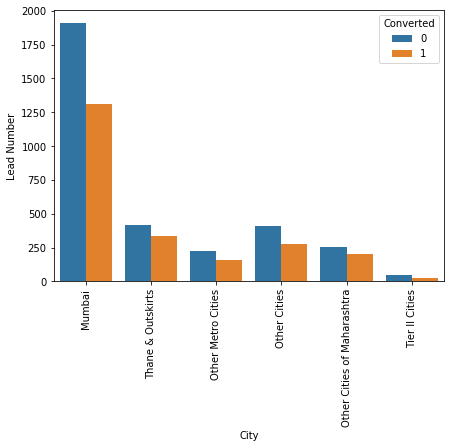

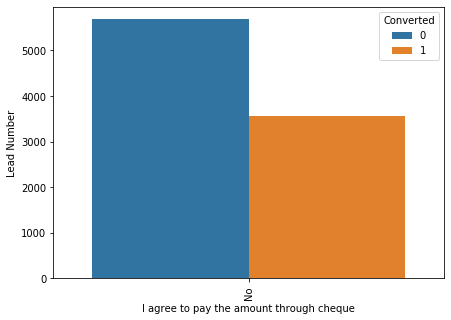

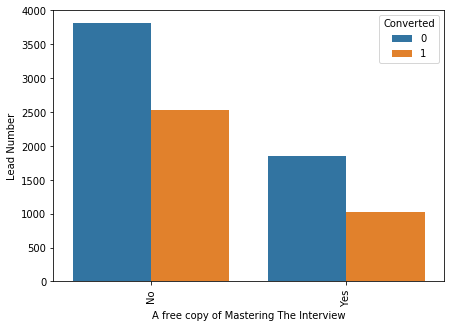

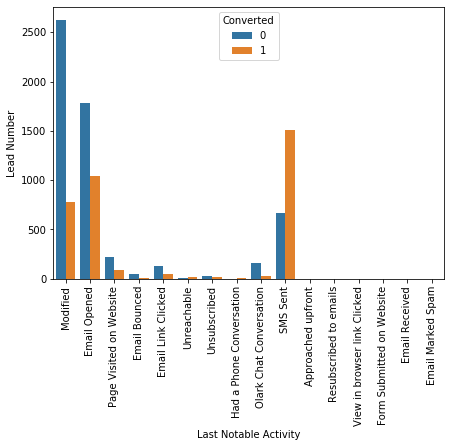

In [17]:
col_graph = lead_data[['Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'Last Activity',
       'Country', 'Specialization', 
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
        'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity']]
for item in col_graph:
    univar_graph(df=lead_data,col=item,vartype=1)

In [18]:
lead_data['Lead Origin'].value_counts(dropna=False)

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

In [19]:
lead_data['Lead Origin'] = lead_data['Lead Origin'].replace('Quick Add Form', 'Lead Add Form')
lead_data['Lead Origin'].value_counts(dropna=False)

Landing Page Submission    4886
API                        3580
Lead Add Form               719
Lead Import                  55
Name: Lead Origin, dtype: int64

In [20]:
lead_data['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

In [21]:
lead_data['Last Activity'].fillna('Unknown',inplace=True)
count = lead_data['Last Activity'].value_counts(dropna=False)
threshold = 20
lead_data['Last Activity'] = np.where(lead_data['Last Activity'].isin(count.index[count >= threshold ]), lead_data['Last Activity'], 'Other')
lead_data['Last Activity'].value_counts(dropna=False)

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Email Link Clicked            267
Form Submitted on Website     116
Unknown                       103
Unreachable                    93
Unsubscribed                   61
Had a Phone Conversation       30
Other                          21
Name: Last Activity, dtype: int64

In [22]:
lead_data['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Live Chat               2
Social Media            2
Press_Release           2
Pay per Click Ads       1
welearnblog_Home        1
blog                    1
NC_EDM                  1
testone                 1
WeLearn                 1
youtubechannel          1
Name: Lead Source, dtype: int64

In [23]:
lead_data['Lead Source'].fillna('Unknown',inplace=True)
lead_data['Lead Origin'] = lead_data['Lead Origin'].replace('google', 'Google')
lead_data['Lead Origin'] = lead_data['Lead Origin'].replace('welearnblog_Home', 'WeLearn')
count = lead_data['Lead Source'].value_counts(dropna=False)
threshold = 50
lead_data['Lead Source'] = np.where(lead_data['Lead Source'].isin(count.index[count >= threshold ]), lead_data['Lead Source'], 'Other')
lead_data['Lead Source'].value_counts(dropna=False)

Google              2868
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Other                 64
Facebook              55
Name: Lead Source, dtype: int64

In [24]:
lead_data['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
South Africa               4
Germany                    4
Nigeria                    4
Canada                     4
Kuwait                     4
Sweden                     3
Netherlands                2
China                      2
Asia/Pacific Region        2
Italy                      2
Belgium                    2
Bangladesh                 2
Uganda                     2
Philippines                2
Ghana                      2
Liberia                    1
Russia                     1
Denmark                    1
Tanzania                   1
Kenya                      1
Indonesia     

In [25]:
lead_data.loc[lead_data['City'] == 'Mumbai', 'Country'] = 'India'
lead_data.loc[lead_data['City'] == 'Other Cities of Maharashtra', 'Country'] = 'India'
lead_data.loc[lead_data['City'] == 'Thane & Outskirts', 'Country'] = 'India'
lead_data['Country'] = lead_data['Country'].replace('Switzerland', 'Europe')
lead_data['Country'] = lead_data['Country'].replace('Denmark', 'Europe')
lead_data['Country'] = lead_data['Country'].replace('Russia', 'Europe')
lead_data['Country'] = lead_data['Country'].replace('Belgium', 'Europe')
lead_data['Country'] = lead_data['Country'].replace('Italy', 'Europe')
lead_data['Country'] = lead_data['Country'].replace('Netherlands', 'Europe')
lead_data['Country'] = lead_data['Country'].replace('Sweden', 'Europe')
lead_data['Country'] = lead_data['Country'].replace('Germany', 'Europe')
lead_data['Country'] = lead_data['Country'].replace('France', 'Europe')
lead_data['Country'] = lead_data['Country'].replace('United Kingdom', 'Europe')
lead_data['Country'] = lead_data['Country'].replace('United Arab Emirates', 'Middle East')
lead_data['Country'] = lead_data['Country'].replace('Saudi Arabia', 'Middle East')
lead_data['Country'] = lead_data['Country'].replace('Qatar', 'Middle East')
lead_data['Country'] = lead_data['Country'].replace('Oman', 'Middle East')
lead_data['Country'] = lead_data['Country'].replace('Bahrain', 'Middle East')
lead_data['Country'] = lead_data['Country'].replace('Kuwait', 'Middle East')
lead_data['Country'] = lead_data['Country'].replace('United States', 'North America')
lead_data['Country'] = lead_data['Country'].replace('Canada', 'North America')
lead_data['Country'] = lead_data['Country'].replace('Nigeria', 'Africa')
lead_data['Country'] = lead_data['Country'].replace('Ghana', 'Africa')
lead_data['Country'] = lead_data['Country'].replace('Uganda', 'Africa')
lead_data['Country'] = lead_data['Country'].replace('Kenya', 'Africa')
lead_data['Country'] = lead_data['Country'].replace('Tanzania', 'Africa')
lead_data['Country'] = lead_data['Country'].replace('Liberia', 'Africa')
lead_data['Country'] = lead_data['Country'].replace('South Africa', 'Africa')
lead_data['Country'] = lead_data['Country'].replace('Singapore', 'South & South-East Asia')
lead_data['Country'] = lead_data['Country'].replace('Hong Kong', 'South & South-East Asia')
lead_data['Country'] = lead_data['Country'].replace('Asia/Pacific Region', 'South & South-East Asia')
lead_data['Country'] = lead_data['Country'].replace('China', 'South & South-East Asia')
lead_data['Country'] = lead_data['Country'].replace('Philippines', 'South & South-East Asia')
lead_data['Country'].fillna('India',inplace=True) #India
count = lead_data['Country'].value_counts(dropna=False)
threshold = 60
lead_data['Country'] = np.where(lead_data['Country'].isin(count.index[count >= threshold ]), lead_data['Country'], 'Other')
lead_data['Country'].value_counts(dropna=False)

India    9090
Other     150
Name: Country, dtype: int64

In [26]:
lead_data = lead_data.drop(['Country'], axis = 1) 

In [27]:
lead_data['Specialization'].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [28]:
lead_data['Specialization'].fillna('Not specified',inplace=True)
lead_data['Specialization'].value_counts(dropna=False)

Not specified                        3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [29]:
lead_data['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [30]:
lead_data['What is your current occupation'].fillna('Not selected',inplace=True)
count = lead_data['What is your current occupation'].value_counts(dropna=False)
threshold = 5
lead_data['What is your current occupation'] = np.where(lead_data['What is your current occupation'].isin(count.index[count >= threshold ]), lead_data['What is your current occupation'], 'Other')
lead_data['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
Not selected            2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [31]:
lead_data['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [32]:
lead_data['Tags'].fillna('No status',inplace=True)
lead_data['Tags'] = lead_data['Tags'].replace('wrong number given', 'Not reachable')
lead_data['Tags'] = lead_data['Tags'].replace('invalid number', 'Not reachable')
lead_data['Tags'] = lead_data['Tags'].replace('opp hangup', 'Not reachable')
lead_data['Tags'] = lead_data['Tags'].replace('number not provided', 'Not reachable')
lead_data['Tags'] = lead_data['Tags'].replace('switched off', 'Not reachable')
lead_data['Tags'] = lead_data['Tags'].replace('Busy', 'Not reachable')
count = lead_data['Tags'].value_counts(dropna=False)
threshold = 0
lead_data['Tags'] = np.where(lead_data['Tags'].isin(count.index[count >= threshold ]), lead_data['Tags'], 'Other')
lead_data['Tags'].value_counts(dropna=False)

No status                                            3353
Will revert after reading the email                  2072
Ringing                                              1203
Not reachable                                         616
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
Diploma holder (Not Eligible)                          63
in touch with EINS                                     12
Lost to Others                                          7
Want to take admission but has financial problems       6
Still Thinking                                          6
Interested in Next batch                                5
In confusion w

In [33]:
lead_data['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [34]:
lead_data['City'].fillna('Not assigned',inplace=True)
count = lead_data['City'].value_counts(dropna=False)
threshold = 10
lead_data['City'] = np.where(lead_data['City'].isin(count.index[count >= threshold ]), lead_data['City'], 'Other')
lead_data['City'].value_counts(dropna=False)

Not assigned                   3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [35]:
lead_data = lead_data.drop(['City'], axis = 1) 

In [36]:
lead_data['Last Notable Activity'].value_counts(dropna=False)

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Form Submitted on Website          1
View in browser link Clicked       1
Resubscribed to emails             1
Approached upfront                 1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [37]:
count = lead_data['Last Notable Activity'].value_counts(dropna=False)
threshold = 10
lead_data['Last Notable Activity'] = np.where(lead_data['Last Notable Activity'].isin(count.index[count >= threshold ]), lead_data['Last Notable Activity'], 'Other')
lead_data['Last Notable Activity'].value_counts(dropna=False)

Modified                    3407
Email Opened                2827
SMS Sent                    2172
Page Visited on Website      318
Olark Chat Conversation      183
Email Link Clicked           173
Email Bounced                 60
Unsubscribed                  47
Unreachable                   32
Had a Phone Conversation      14
Other                          7
Name: Last Notable Activity, dtype: int64

In [38]:
lead_data['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [39]:
lead_data['What matters most to you in choosing a course'].fillna('Not specified',inplace=True)
count = lead_data['What matters most to you in choosing a course'].value_counts(dropna=False)
threshold = 0 #100
lead_data['What matters most to you in choosing a course'] = np.where(lead_data['What matters most to you in choosing a course'].isin(count.index[count >= threshold ]), lead_data['What matters most to you in choosing a course'], 'Other')
lead_data['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
Not specified                2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [40]:
lead_data = lead_data.drop(['Do Not Call', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Receive More Updates About Our Courses', 'Get updates on DM Content', 'I agree to pay the amount through cheque', 'Update me on Supply Chain Content'], axis = 1) 

In [41]:
lead_data

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,Tags,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,0,0.0,0,0.00,Page Visited on Website,Not specified,Unemployed,Better Career Prospects,Interested in other courses,No,Modified
1,660728,API,Organic Search,No,0,5.0,674,2.50,Email Opened,Not specified,Unemployed,Better Career Prospects,Ringing,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.00,Email Opened,Business Administration,Student,Better Career Prospects,Will revert after reading the email,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.00,Unreachable,Media and Advertising,Unemployed,Better Career Prospects,Ringing,No,Modified
4,660681,Landing Page Submission,Google,No,1,2.0,1428,1.00,Converted to Lead,Not specified,Unemployed,Better Career Prospects,Will revert after reading the email,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,579564,Landing Page Submission,Direct Traffic,Yes,1,8.0,1845,2.67,Other,IT Projects Management,Unemployed,Better Career Prospects,Will revert after reading the email,No,Other
9236,579546,Landing Page Submission,Direct Traffic,No,0,2.0,238,2.00,SMS Sent,Media and Advertising,Unemployed,Better Career Prospects,Not reachable,Yes,SMS Sent
9237,579545,Landing Page Submission,Direct Traffic,Yes,0,2.0,199,2.00,SMS Sent,Business Administration,Unemployed,Better Career Prospects,Not reachable,Yes,SMS Sent
9238,579538,Landing Page Submission,Google,No,1,3.0,499,3.00,SMS Sent,Human Resource Management,Not selected,Not specified,No status,No,SMS Sent


In [42]:
lead_data.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

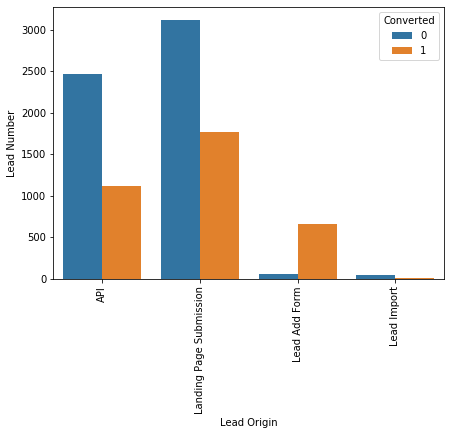

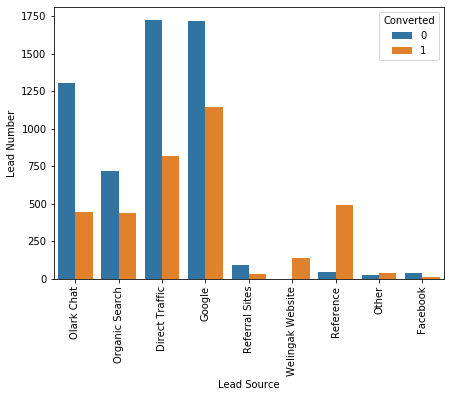

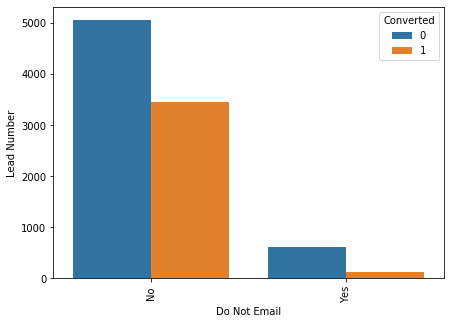

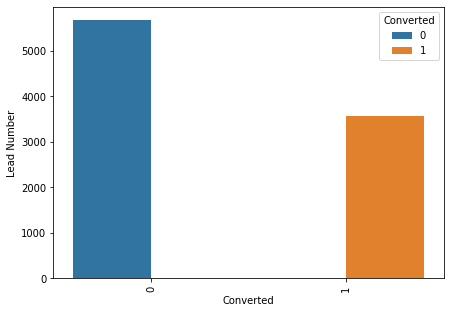

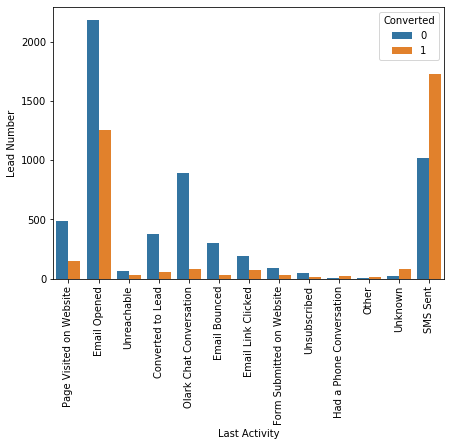

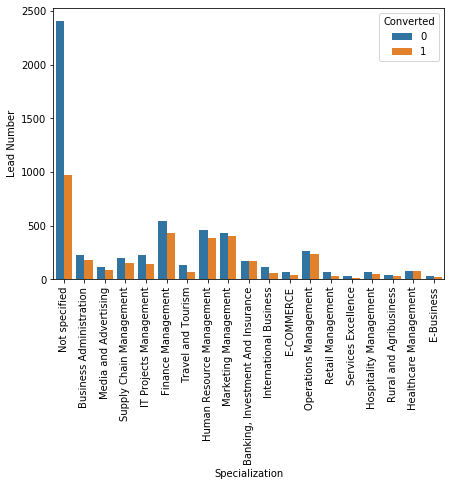

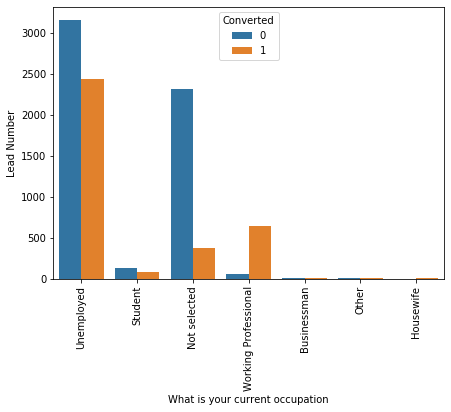

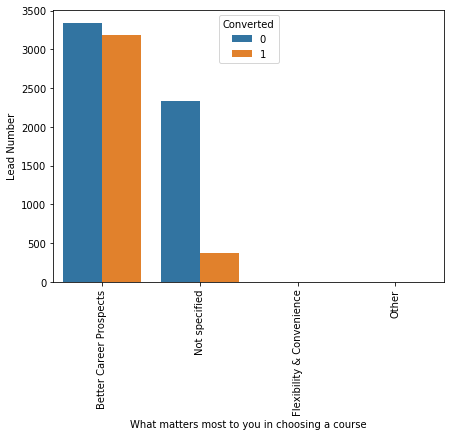

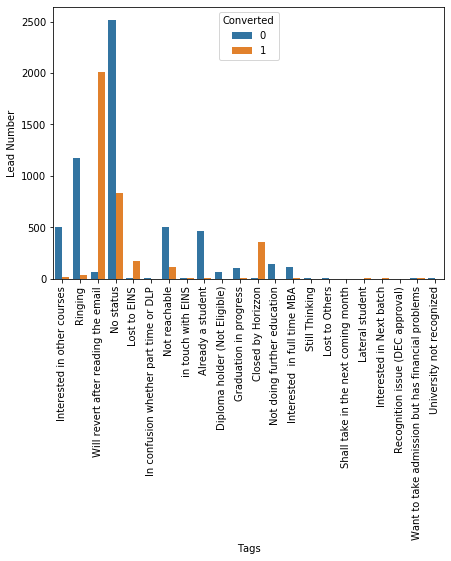

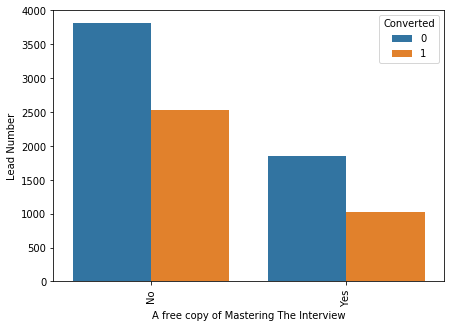

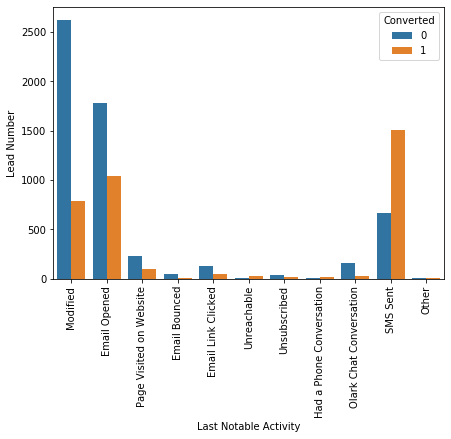

In [43]:
col_graph = lead_data[['Lead Origin', 'Lead Source', 'Do Not Email',
       'Converted', 'Last Activity',  'Specialization',
        'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags',  
       'A free copy of Mastering The Interview', 'Last Notable Activity']]
for item in col_graph:
    univar_graph(df=lead_data,col=item,vartype=1)

In [44]:
nan_counts = round((lead_data.isna().sum()), 5)
nan_counts

Lead Number                                        0
Lead Origin                                        0
Lead Source                                        0
Do Not Email                                       0
Converted                                          0
TotalVisits                                      137
Total Time Spent on Website                        0
Page Views Per Visit                             137
Last Activity                                      0
Specialization                                     0
What is your current occupation                    0
What matters most to you in choosing a course      0
Tags                                               0
A free copy of Mastering The Interview             0
Last Notable Activity                              0
dtype: int64

In [45]:
lead_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820
std,23405.995698,0.486714,4.854853,548.021466,2.161418
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000


In [46]:
lead_data['TotalVisits'].fillna(3,inplace=True)
lead_data['Page Views Per Visit'].fillna(2,inplace=True)
nan_counts = round((lead_data.isna().sum()), 5)
nan_counts

Lead Number                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Specialization                                   0
What is your current occupation                  0
What matters most to you in choosing a course    0
Tags                                             0
A free copy of Mastering The Interview           0
Last Notable Activity                            0
dtype: int64

In [47]:
#Data imbalance
(lead_data['Converted'].value_counts()*100)/len(lead_data)

0    61.461039
1    38.538961
Name: Converted, dtype: float64

## Create dummy values

### For binary values

In [48]:
varlist =  ['A free copy of Mastering The Interview', 'Do Not Email']
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})
lead_data[varlist] = lead_data[varlist].apply(binary_map)

### Get dummies

In [49]:
dummy1 = pd.get_dummies(lead_data[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
        'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags', 
            'Last Notable Activity']], drop_first=True)
lead_data = pd.concat([lead_data, dummy1], axis=1)
lead_data.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,660737,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Not specified,...,0,0,0,1,0,0,0,0,0,0
1,660728,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Not specified,...,0,1,0,0,0,0,0,0,0,0
2,660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,...,0,1,0,0,0,0,0,0,0,0
3,660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,...,0,0,0,1,0,0,0,0,0,0
4,660681,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Not specified,...,0,0,0,1,0,0,0,0,0,0


In [50]:
lead_data = lead_data.drop(['Lead Origin', 'Lead Source', 'Last Activity',  'Specialization',
        'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags',  
       'Last Notable Activity'], 1)
lead_data.head()

,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,660737,0,0,0.0,0,0.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,660728,0,0,5.0,674,2.5,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,660727,0,1,2.0,1532,2.0,1,1,0,0,...,0,1,0,0,0,0,0,0,0,0
3,660719,0,0,1.0,305,1.0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,660681,0,1,2.0,1428,1.0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


### Checking for outliers

In [51]:
num_lead_data = lead_data[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']]

In [52]:
num_lead_data.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000
mean,3.438636,487.698268,2.357440
std,4.819024,548.021466,2.145781
min,0.000000,0.000000,0.000000
25%,1.000000,12.000000,1.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
90%,7.000000,1380.000000,5.000000
95%,10.000000,1562.000000,6.000000
99%,17.000000,1840.610000,9.000000


In [53]:
def outlier_graph(df, col, vartype):
    fig, ax=plt.subplots(nrows =1,ncols=2,figsize=(20,8))
    ax[0].set_title("Distribution Plot")
    sns.distplot(lead_data[col],ax=ax[0])
    ax[1].set_title("Box Plot")
    sns.boxplot(data =lead_data, x=col,ax=ax[1],orient='v')

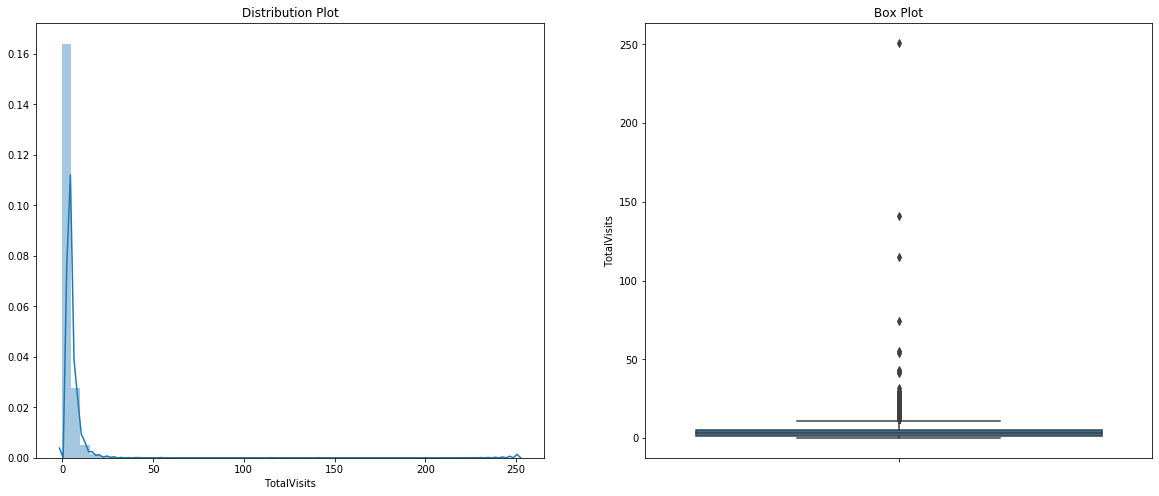

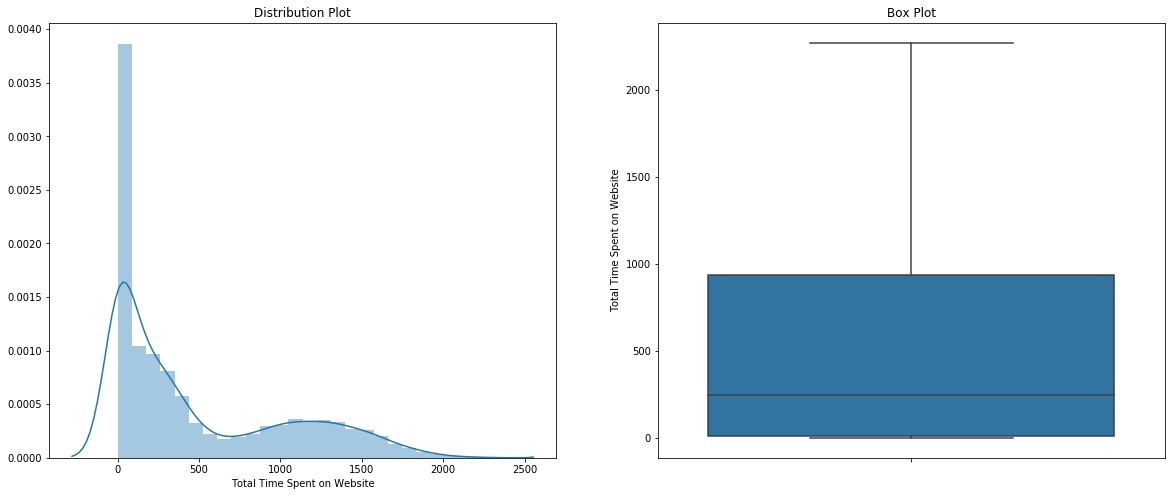

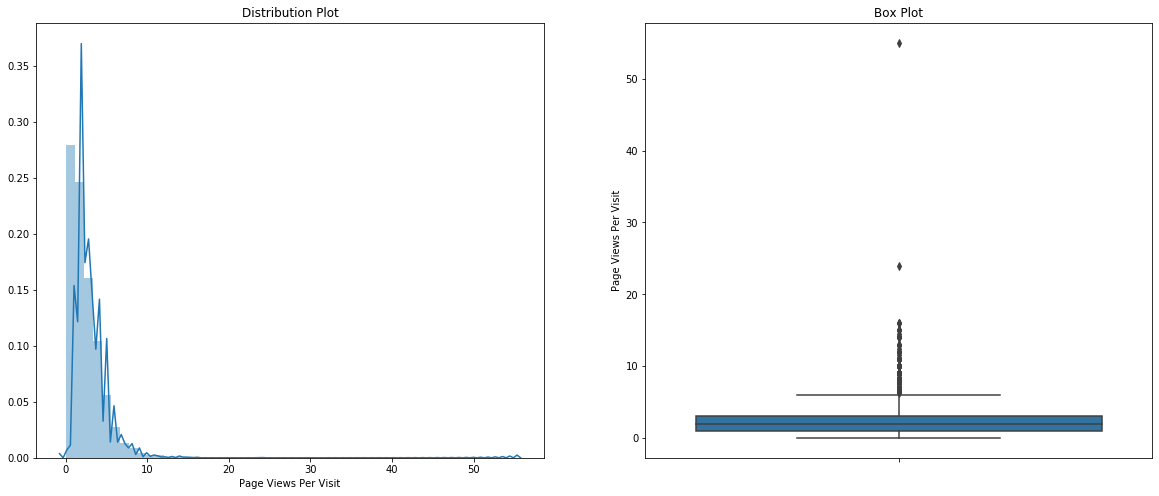

In [54]:
col_graph = lead_data[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']]
for item in col_graph:
    outlier_graph(df=lead_data,col=item,vartype=1)

In [55]:
Q3 = lead_data['TotalVisits'].quantile(0.99)
lead_data = lead_data[(lead_data['TotalVisits'] <= Q3)]

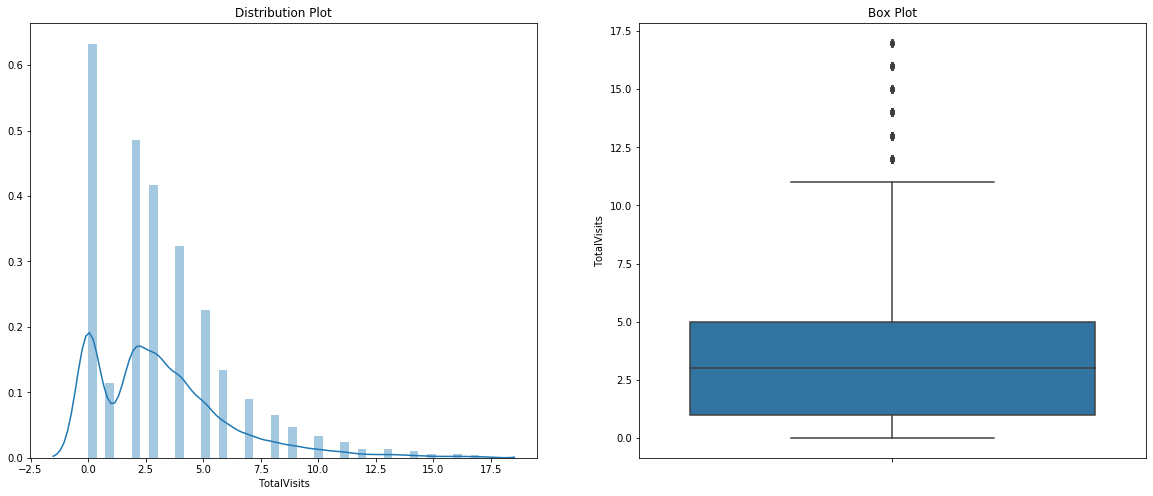

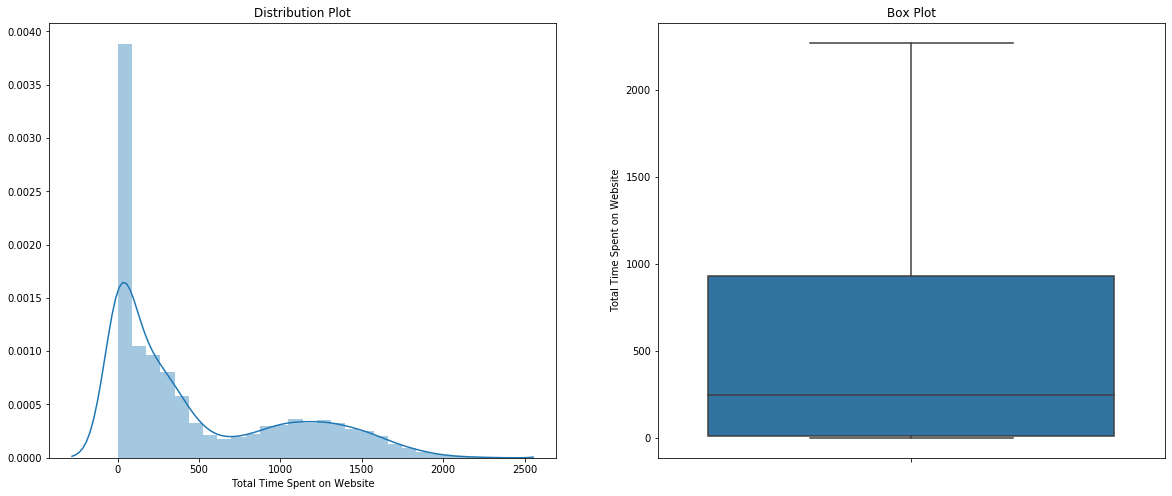

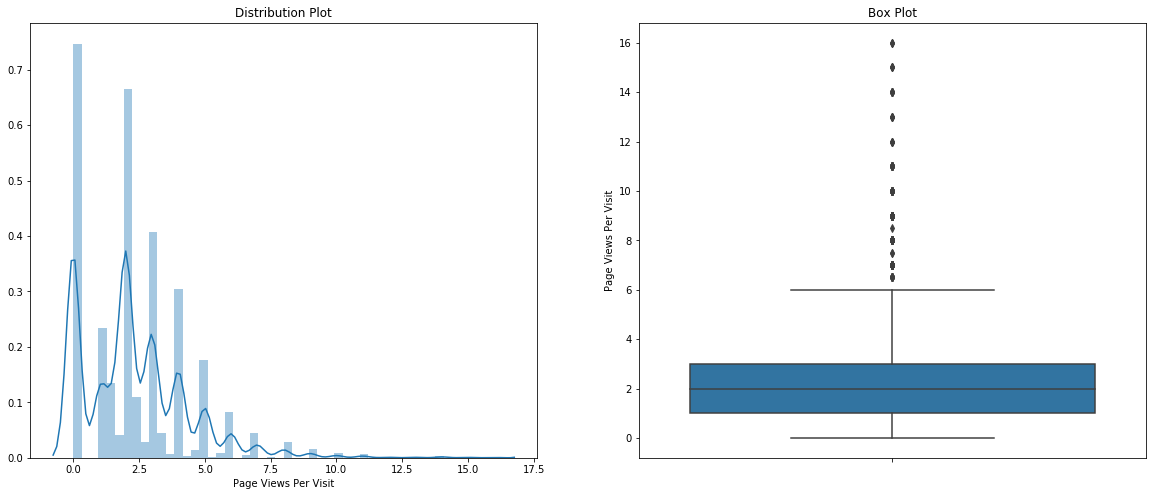

In [56]:
col_graph = lead_data[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']]
for item in col_graph:
    outlier_graph(df=lead_data,col=item,vartype=1)

In [57]:
lead_data.shape

(9157, 88)

## Looking at correlations

#plt.figure(figsize = (20,10)) To many features to effectively have a look at highly correlated features. Will use REF/VIF.
#chart1 = sns.heatmap(lead_data.corr(),annot = True)
#bottom, top = chart1.get_ylim()
#chart1.set_ylim(bottom + 0.5, top -0.5)
#plt.show()

In [58]:
lead_data.columns

Index(['Lead Number', 'Do Not Email', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Other', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unknown', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed', 'Specialization_Business Administrati

## Test-train set

In [59]:
X = lead_data.drop(['Converted','Lead Number'], axis=1)
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,2.0,1532,2.0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,2.0,1428,1.0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [60]:
y = lead_data['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Feature scaling

In [62]:
scaler = StandardScaler()
X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
6490,0,-0.744597,-0.831303,-0.647913,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4026,1,-0.069711,-0.578290,-0.405762,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
6453,0,2.967279,-0.130933,1.773595,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8949,0,0.942619,-0.594791,-0.405762,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
6467,0,2.629836,-0.767133,4.195103,1,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [63]:
converted = (sum(lead_data['Converted'])/len(lead_data['Converted'].index))*100
converted

38.49514032980233

## Building the model

In [64]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6409
Model:                            GLM   Df Residuals:                     6323
Model Family:                Binomial   Df Model:                           85
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Fri, 29 May 2020   Deviance:                          nan
Time:                        13:36:53   Pearson chi2:                 2.51e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                   -1.956e+15   3.33e+07  -5.88e+07      0.000   -1.96e+15   -1.96e+15
Do Not Email                                                            -3.063e+14   4.42e+06  -6.94e+07      0.000   -3.06e+14   -3.06e+14
TotalVisits                                                              6.128e+13   1.37e+06   4.47e+07      0.000    6.13e+13    6.13e+13
Total Time Spent on Website                                              9.214e+13   1.03e+06   8.95e+07      0.000    9.21e+13    9.21e+13
Page Views Per Visit                                                    -3.227e+13   1.43e+06  -2.26e+07      0.000   -3.23e+13   -3.23e+13
A free copy of Mastering The Interview                                   9.922e+11   2.73e+06   3.63e+05      0.000    9.92e+11    9.92e+11
Lead Origin_Landing Page Submission                                     -1.219e+14   3.47e+06  -3.52e+07      0.000   -1.22e+14   -1.22e+14
Lead Origin_Lead Add Form                                               -3.009e+13   2.02e+07  -1.49e+06      0.000   -3.01e+13   -3.01e+13
Lead Origin_Lead Import                                                  3.091e+15   6.86e+07   4.51e+07      0.000    3.09e+15    3.09e+15
Lead Source_Facebook                                                    -3.276e+15   6.76e+07  -4.85e+07      0.000   -3.28e+15   -3.28e+15
Lead Source_Google                                                       6.175e+13    2.9e+06   2.13e+07      0.000    6.17e+13    6.17e+13
Lead Source_Olark Chat                                                  -1.545e+14   4.02e+06  -3.85e+07      0.000   -1.55e+14   -1.55e+14
Lead Source_Organic Search                                               5.211e+13   3.28e+06   1.59e+07      0.000    5.21e+13    5.21e+13
Lead Source_Other                                                         3.63e+14   1.66e+07   2.19e+07      0.000    3.63e+14    3.63e+14
Lead Source_Reference                                                    -1.46e+14   2.05e+07  -7.14e+06      0.000   -1.46e+14   -1.46e+14
Lead Source_Referral Sites                                               2.616e+14   7.86e+06   3.33e+07      0.000    2.62e+14    2.62e+14
Lead Source_Welingak Website                                             2.815e+14   2.14e+07   1.32e+07      0.000    2.81e+14    2.81e+14
Last Activity_Email Bounced                                             -7.185e+13   7.48e+06  -9.61e+06      0.000   -7.19e+13   -7.19e+13
Last Activity_Email Link Clicked                                         4.904e+14   9.26e+06    5.3e+07      0.000     4.9e+14     4.9e+14
Las

## Feature selection using RFE

In [65]:
logreg = LogisticRegression()
rfe = RFE(logreg, 10)
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 7),
 ('TotalVisits', False, 52),
 ('Total Time Spent on Website', False, 6),
 ('Page Views Per Visit', False, 61),
 ('A free copy of Mastering The Interview', False, 39),
 ('Lead Origin_Landing Page Submission', False, 33),
 ('Lead Origin_Lead Add Form', False, 4),
 ('Lead Origin_Lead Import', False, 64),
 ('Lead Source_Facebook', False, 32),
 ('Lead Source_Google', False, 75),
 ('Lead Source_Olark Chat', False, 5),
 ('Lead Source_Organic Search', False, 68),
 ('Lead Source_Other', False, 22),
 ('Lead Source_Reference', False, 31),
 ('Lead Source_Referral Sites', False, 57),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 15),
 ('Last Activity_Email Link Clicked', False, 67),
 ('Last Activity_Email Opened', False, 24),
 ('Last Activity_Form Submitted on Website', False, 26),
 ('Last Activity_Had a Phone Conversation', False, 12),
 ('Last Activity_Olark Chat Conversation', False, 14),
 ('Last Activity_Other', False, 36),
 ('La

In [66]:
col = X_train.columns[rfe.support_]
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Other', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other',
       'Last Activity_Page Visited on Website', 'Last Activity_Unknown',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance

In [67]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6409
Model:                            GLM   Df Residuals:                     6398
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1360.9
Date:                Fri, 29 May 2020   Deviance:                       2721.9
Time:                        13:36:55   Pearson chi2:                 1.14e+04
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
===============================================================================================================================
                                                                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------
const                                                          -2.9170      0.132    -22.071      0.000      -3.176      -2.658
Lead Source_Welingak Website                                    2.7998      0.746      3.753      0.000       1.337       4.262
Last Activity_SMS Sent                                          2.2112      0.114     19.395      0.000       1.988       2.435
What matters most to you in choosing a course_Not specified    -2.6285      0.143    -18.359      0.000      -2.909      -2.348
Tags_Closed by Horizzon                                         8.6251      0.728     11.852      0.000       7.199      10.051
Tags_Lateral student                                           23.3880   1.65e+04      0.001      0.999   -3.23e+04    3.23e+04
Tags_Lost to EINS                                               8.4873      0.568     14.945      0.000       7.374       9.600
Tags_No status                                                  3.3649      0.168     20.061      0.000       3.036       3.694
Tags_Ringing                                                   -1.9898      0.259     -7.697      0.000      -2.496      -1.483
Tags_Will revert after reading the email                        6.1026      0.198     30.875      0.000       5.715       6.490
Last Notable Activity_Modified                                 -1.4581      0.118    -12.316      0.000      -1.690      -1.226
===============================================================================================================================
"""

### Calculate predicted value

In [68]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

6490    0.012430
4026    0.934567
6453    0.330509
8949    0.960288
6467    0.063229
3481    0.025614
2209    0.012430
1608    0.015463
2969    0.025614
8560    0.266946
dtype: float64

In [69]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.01243035, 0.9345666 , 0.33050929, 0.96028753, 0.06322937,
       0.02561372, 0.01243035, 0.01546286, 0.02561372, 0.26694594])

In [70]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conv_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Conv_Prob,LeadID
0,0,0.012430,6490
1,1,0.934567,4026
2,1,0.330509,6453
3,1,0.960288,8949
4,0,0.063229,6467


In [71]:
y_train_pred_final['predicted'] = y_train_pred_final.Conv_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conv_Prob,LeadID,predicted
0,0,0.012430,6490,0
1,1,0.934567,4026,1
2,1,0.330509,6453,0
3,1,0.960288,8949,1
4,0,0.063229,6467,0


### Confusion matrix

In [72]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3705  224]
 [ 242 2238]]


### Accuracy

In [73]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.927289748790763


### Checking VIF

In [74]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Lead Source_Welingak Website,1.11
3,Tags_Closed by Horizzon,1.06
5,Tags_Lost to EINS,1.05
4,Tags_Lateral student,1.00
2,What matters most to you in choosing a course_...,0.20
8,Tags_Will revert after reading the email,0.16
1,Last Activity_SMS Sent,0.11
6,Tags_No status,0.08
7,Tags_Ringing,0.06
9,Last Notable Activity_Modified,0.04


In [75]:
col = col.drop(['Tags_Lateral student'], 1)
col

Index(['Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'What matters most to you in choosing a course_Not specified',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_No status',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Last Notable Activity_Modified'],
      dtype='object')

In [76]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6409
Model:                            GLM   Df Residuals:                     6399
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1366.5
Date:                Fri, 29 May 2020   Deviance:                       2733.1
Time:                        13:36:55   Pearson chi2:                 1.14e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
===============================================================================================================================
                                                                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------
const                                                          -2.8971      0.131    -22.103      0.000      -3.154      -2.640
Lead Source_Welingak Website                                    2.7966      0.746      3.750      0.000       1.335       4.258
Last Activity_SMS Sent                                          2.2241      0.114     19.549      0.000       2.001       2.447
What matters most to you in choosing a course_Not specified    -2.6335      0.143    -18.384      0.000      -2.914      -2.353
Tags_Closed by Horizzon                                         8.5895      0.727     11.809      0.000       7.164      10.015
Tags_Lost to EINS                                               8.4569      0.567     14.903      0.000       7.345       9.569
Tags_No status                                                  3.3386      0.167     20.013      0.000       3.012       3.666
Tags_Ringing                                                   -2.0215      0.258     -7.835      0.000      -2.527      -1.516
Tags_Will revert after reading the email                        6.0727      0.197     30.881      0.000       5.687       6.458
Last Notable Activity_Modified                                 -1.4399      0.118    -12.229      0.000      -1.671      -1.209
===============================================================================================================================
"""

In [77]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final['Conv_Prob'] = y_train_pred
y_train_pred_final['predicted'] = y_train_pred_final.Conv_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conv_Prob,LeadID,predicted
0,0,0.012907,6490,0
1,1,0.934967,4026,1
2,1,0.337837,6453,0
3,1,0.959909,8949,1
4,0,0.063304,6467,0


### Adjusted accuracy

In [78]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9268216570447808


### Adjusted VIF

In [79]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Lead Source_Welingak Website,1.11
3,Tags_Closed by Horizzon,1.06
4,Tags_Lost to EINS,1.05
2,What matters most to you in choosing a course_...,0.20
7,Tags_Will revert after reading the email,0.16
1,Last Activity_SMS Sent,0.11
5,Tags_No status,0.08
6,Tags_Ringing,0.06
8,Last Notable Activity_Modified,0.04


## Other measures

In [80]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [81]:
print('Accuracy: ', round(100*(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)), 2))
print('Sensitivity: ', round(100*(TP / float(TP+FN)), 2))
print('Specificity: ', round(100*(TN / float(TN+FP)), 2))
print('False positive rate: ', round(100*(FP/ float(TN+FP)), 2))
print('Positive predictive value: ', round(100*(TP / float(TP+FP)), 2))
print('Negative predictive value: ', round(100*(TN / float(TN+FN)), 2))
print('Precision: ', round(100*(TP / float(TP + FP)), 2))
print('Recall: ', round(100*(TP / float(TP + FN)), 2))

Accuracy:  92.68
Sensitivity:  90.24
Specificity:  94.3
False positive rate:  5.7
Positive predictive value:  90.9
Negative predictive value:  93.87
Precision:  90.9
Recall:  90.24


## ROC Curve

In [82]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [83]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conv_Prob, drop_intermediate = False )

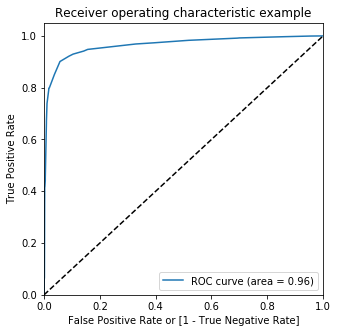

In [84]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conv_Prob)

## Optimal cut-off point

In [85]:
numbers = [float(x)/40 for x in range(40)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conv_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conv_Prob,LeadID,predicted,0.0,0.025,0.05,0.075,0.1,0.125,...,0.75,0.775,0.8,0.825,0.85,0.875,0.9,0.925,0.95,0.975
0,0,0.012907,6490,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0.934967,4026,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,0
2,1,0.337837,6453,0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,1,0.959909,8949,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
4,0,0.063304,6467,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [86]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.025,0.05,0.075,0.1,0.125,0.15,0.175,0.2,0.225,0.25,0.275,0.3,0.325,0.35,0.375,0.4,0.425,0.45,0.475,0.5,0.525,0.55,0.575,0.6,0.625,0.65,0.675,0.7,0.725,0.75,0.775,0.8,0.825,0.85,0.875,0.9,0.925,0.95,0.975]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

        prob  accuracy     sensi     speci
0.000  0.000  0.386956  1.000000  0.000000
0.025  0.025  0.572320  0.991532  0.307712
0.050  0.050  0.676081  0.983065  0.482311
0.075  0.075  0.786394  0.968952  0.671163
0.100  0.100  0.786394  0.968952  0.671163
0.125  0.125  0.890311  0.941532  0.857979
0.150  0.150  0.890311  0.941532  0.857979
0.175  0.175  0.890311  0.941532  0.857979
0.200  0.200  0.909034  0.929839  0.895902
0.225  0.225  0.909034  0.929839  0.895902
0.250  0.250  0.909034  0.929839  0.895902
0.275  0.275  0.915119  0.921774  0.910919
0.300  0.300  0.915119  0.921774  0.910919
0.325  0.325  0.915119  0.921774  0.910919
0.350  0.350  0.926822  0.901210  0.942988
0.375  0.375  0.926822  0.901210  0.942988
0.400  0.400  0.926822  0.901210  0.942988
0.425  0.425  0.926822  0.901210  0.942988
0.450  0.450  0.926822  0.901210  0.942988
0.475  0.475  0.926822  0.901210  0.942988
0.500  0.500  0.926822  0.901210  0.942988
0.525  0.525  0.919644  0.850806  0.963095
0.550  0.55

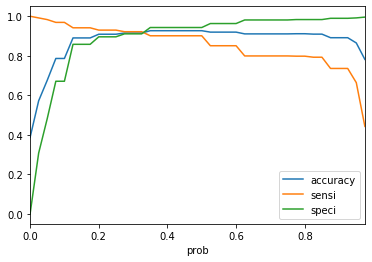

In [87]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

## Final prediction based on 0.3 cut-off

In [88]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conv_Prob.map( lambda x: 1 if x > 0.3 else 0)
y_train_pred_final.head()

,Converted,Conv_Prob,LeadID,predicted,0.0,0.025,0.05,0.075,0.1,0.125,...,0.775,0.8,0.825,0.85,0.875,0.9,0.925,0.95,0.975,final_predicted
0,0,0.012907,6490,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0.934967,4026,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,0,1
2,1,0.337837,6453,0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
3,1,0.959909,8949,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,1
4,0,0.063304,6467,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Final confusion matrix

In [89]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3579,  350],
       [ 194, 2286]], dtype=int64)

### Other measures

In [90]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [91]:
print('Accuracy: ', round(100*(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)), 2))
print('Sensitivity: ', round(100*(TP / float(TP+FN)), 2))
print('Specificity: ', round(100*(TN / float(TN+FP)), 2))
print('False positive rate: ', round(100*(FP/ float(TN+FP)), 2))
print('Positive predictive value: ', round(100*(TP / float(TP+FP)), 2))
print('Negative predictive value: ', round(100*(TN / float(TN+FN)), 2))
print('Precision: ', round(100*(TP / float(TP + FP)), 2))
print('Recall: ', round(100*(TP / float(TP + FN)), 2))

Accuracy:  92.68
Sensitivity:  92.18
Specificity:  91.09
False positive rate:  8.91
Positive predictive value:  86.72
Negative predictive value:  94.86
Precision:  86.72
Recall:  92.18


### Prediction and recall trade-off

In [92]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       1
 2       1
 3       1
 4       0
        ..
 6404    0
 6405    1
 6406    1
 6407    1
 6408    1
 Name: Converted, Length: 6409, dtype: int64, 0       0
 1       1
 2       0
 3       1
 4       0
        ..
 6404    0
 6405    1
 6406    1
 6407    1
 6408    1
 Name: predicted, Length: 6409, dtype: int64)

In [93]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conv_Prob)

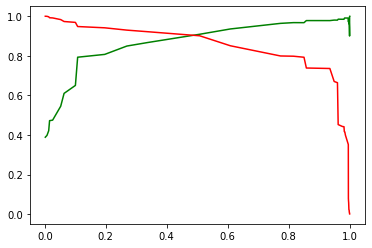

In [94]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Making predictions on test data

In [95]:
X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])
X_test = X_test[col]
X_test.head()

,Lead Source_Welingak Website,Last Activity_SMS Sent,What matters most to you in choosing a course_Not specified,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_No status,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_Modified
7359,0,1,0,0,0,0,0,0,0
2201,0,0,0,0,0,0,0,0,1
2473,0,1,0,0,0,0,0,1,0
8388,0,0,0,0,0,0,0,0,1
2949,0,0,0,0,0,0,0,0,1


In [96]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = res.predict(X_test_sm)
y_pred_1 = pd.DataFrame(y_test_pred)
y_test_df = pd.DataFrame(y_test)
y_test_df['LeadID'] = y_test_df.index
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conv_Prob'})
y_pred_final = y_pred_final[['LeadID','Converted','Conv_Prob']]
y_pred_final['final_predicted'] = y_pred_final.Conv_Prob.map(lambda x: 1 if x > 0.3 else 0)
y_pred_final.head()

,LeadID,Converted,Conv_Prob,final_predicted
0,7359,0,0.337837,1
1,2201,0,0.012907,0
2,2473,1,0.995503,1
3,8388,0,0.012907,0
4,2949,0,0.012907,0


### Check the measures

In [97]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1569,  134],
       [  82,  963]], dtype=int64)

In [98]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [99]:
print('Accuracy: ', round(100*(metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)), 2))
print('Sensitivity: ', round(100*(TP / float(TP+FN)), 2))
print('Specificity: ', round(100*(TN / float(TN+FP)), 2))
print('False positive rate: ', round(100*(FP/ float(TN+FP)), 2))
print('Positive predictive value: ', round(100*(TP / float(TP+FP)), 2))
print('Negative predictive value: ', round(100*(TN / float(TN+FN)), 2))
print('Precision: ', round(100*(TP / float(TP + FP)), 2))
print('Recall: ', round(100*(TP / float(TP + FN)), 2))

Accuracy:  92.14
Sensitivity:  92.15
Specificity:  92.13
False positive rate:  7.87
Positive predictive value:  87.78
Negative predictive value:  95.03
Precision:  87.78
Recall:  92.15


# Creating the final dataset and add the lead score

In [100]:
y_train_pred_final = y_train_pred_final[['LeadID', 'Converted', 'Conv_Prob', 'predicted']]
y_train_pred_final['final_predicted'] = y_train_pred_final['predicted']
y_train_pred_final = y_train_pred_final.drop(['predicted'], axis = 1) 
lead_data_pred = y_train_pred_final.append(y_pred_final)
lead_data_pred['Lead_Score'] = lead_data_pred['Conv_Prob'].apply(lambda x : round(x*100))
lead_data_pred = lead_data_pred.sort_values('Lead_Score', axis = 0, ascending = False)
lead_data_pred.head(20)

,LeadID,Converted,Conv_Prob,final_predicted,Lead_Score
4578,7984,1,0.996166,1,100
2201,7652,1,0.995503,1,100
1344,5291,1,0.995503,1,100
5814,4577,1,0.995503,1,100
2164,7719,1,0.995503,1,100
2165,3388,1,0.995503,1,100
1353,7845,1,0.996640,1,100
2166,8296,1,0.995503,1,100
2169,6384,1,0.995503,1,100
1357,8234,1,0.996166,1,100


In [101]:
lead_data_pred.shape

(9157, 5)